## 고구마(단작),봄배추,봄상추,겨울상추,가을배추,봄무우,가을무우,사과,감자,보리밀 토마토에 대하여 2023년의 데이터를 사용하기 위하여, 2018~2022년도의 날씨 데이터를 기반으로 2023년의 날씨 데이터 시계열 예측

In [ ]:
!pip install prophet

In [ ]:
import pandas as pd
from prophet import Prophet

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/물공모전/서산_토성 채워조.csv", encoding='euc-kr')
data

,지점,지점명,일시,평균기온(°C),일강수량(mm),평균 상대습도(%),합계 일조시간(hr),합계 일사량(MJ/m2),평균 지면온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),10CM 일 토양수분(%),20CM 일 토양수분(%)
0,129,서산,2018-01-01,-2.2,NaN,76.0,8.7,6.95,-0.1,NaN,NaN,NaN,NaN,NaN
1,129,서산,2018-01-02,NaN,NaN,NaN,3.1,2.47,-0.7,NaN,NaN,NaN,NaN,NaN
2,129,서산,2018-01-03,NaN,NaN,NaN,8.7,5.54,-0.1,0.7,1.0,NaN,NaN,NaN
3,129,서산,2018-01-04,-3.9,NaN,62.5,4.5,2.61,-1.2,0.4,0.6,NaN,NaN,NaN
4,129,서산,2018-01-05,-1.9,NaN,72.4,6.9,4.23,-0.5,0.7,0.9,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047,129,서산,2023-08-10,22.6,41.1,92.6,0.0,4.50,24.6,1.1,1.6,55.8,12.0,18.0
2048,129,서산,2023-08-11,24.5,22.5,91.4,0.0,6.99,25.2,1.3,1.9,11.2,35.0,38.0
2049,129,서산,2023-08-12,25.3,8.8,88.8,4.9,18.87,27.3,3.4,4.9,NaN,35.0,37.0
2050,129,서산,2023-08-13,27.1,NaN,80.0,9.6,22.98,29.2,4.5,6.4,NaN,28.0,29.0


In [ ]:
data.isnull().sum()

지점                   0
지점명                  0
일시                   0
평균기온(°C)             7
일강수량(mm)          1267
평균 상대습도(%)           9
합계 일조시간(hr)          6
합계 일사량(MJ/m2)        6
평균 지면온도(°C)          1
합계 대형증발량(mm)        13
합계 소형증발량(mm)        13
9-9강수(mm)         1269
10CM 일 토양수분(%)      83
20CM 일 토양수분(%)      83
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2052 entries, 0 to 2051
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   지점              2052 non-null   int64  
 1   지점명             2052 non-null   object 
 2   일시              2052 non-null   object 
 3   평균기온(°C)        2045 non-null   float64
 4   일강수량(mm)        785 non-null    float64
 5   평균 상대습도(%)      2043 non-null   float64
 6   합계 일조시간(hr)     2046 non-null   float64
 7   합계 일사량(MJ/m2)   2046 non-null   float64
 8   평균 지면온도(°C)     2051 non-null   float64
 9   합계 대형증발량(mm)    2039 non-null   float64
 10  합계 소형증발량(mm)    2039 non-null   float64
 11  9-9강수(mm)       783 non-null    float64
 12  10CM 일 토양수분(%)  1969 non-null   float64
 13  20CM 일 토양수분(%)  1969 non-null   float64
dtypes: float64(11), int64(1), object(2)
memory usage: 224.6+ KB


## 결측 보간

In [ ]:
from scipy import interpolate

In [ ]:
data['일시'] = pd.to_datetime(data['일시'])

In [ ]:
data['평균기온(°C)'] = data['평균기온(°C)'].interpolate()
data['일강수량(mm)'] = data['일강수량(mm)'].interpolate() #강수량을 선형보간 하는게 맞는건지 잘 모르겠긴합니다...
data['평균 상대습도(%)'] = data['평균 상대습도(%)'].interpolate()
data['합계 일조시간(hr)'] = data['합계 일조시간(hr)'].interpolate()
data['합계 일사량(MJ/m2)'] = data['합계 일사량(MJ/m2)'].interpolate()
data['평균 지면온도(°C)'] = data['평균 지면온도(°C)'].interpolate()
data['합계 대형증발량(mm)'] = data['합계 대형증발량(mm)'].interpolate()
data['합계 소형증발량(mm)'] = data['합계 소형증발량(mm)'].interpolate()
data['9-9강수(mm)'] = data['9-9강수(mm)'].interpolate()
data['10CM 일 토양수분(%)'] = data['10CM 일 토양수분(%)'].interpolate()
data['20CM 일 토양수분(%)'] = data['20CM 일 토양수분(%)'].interpolate()

data.isnull().sum()

지점                 0
지점명                0
일시                 0
평균기온(°C)           0
일강수량(mm)           7
평균 상대습도(%)         0
합계 일조시간(hr)        0
합계 일사량(MJ/m2)      0
평균 지면온도(°C)        0
합계 대형증발량(mm)       2
합계 소형증발량(mm)       2
9-9강수(mm)          6
10CM 일 토양수분(%)    19
20CM 일 토양수분(%)    19
dtype: int64

In [ ]:
data[data['10CM 일 토양수분(%)'].isnull()]

,지점,지점명,일시,평균기온(°C),일강수량(mm),평균 상대습도(%),합계 일조시간(hr),합계 일사량(MJ/m2),평균 지면온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),10CM 일 토양수분(%),20CM 일 토양수분(%)
0,129,서산,2018-01-01,-2.200000,NaN,76.0,8.7,6.95,-0.1,NaN,NaN,NaN,NaN,NaN
1,129,서산,2018-01-02,-2.766667,NaN,71.5,3.1,2.47,-0.7,NaN,NaN,NaN,NaN,NaN
2,129,서산,2018-01-03,-3.333333,NaN,67.0,8.7,5.54,-0.1,0.7,1.0,NaN,NaN,NaN
3,129,서산,2018-01-04,-3.900000,NaN,62.5,4.5,2.61,-1.2,0.4,0.6,NaN,NaN,NaN
4,129,서산,2018-01-05,-1.900000,NaN,72.4,6.9,4.23,-0.5,0.7,0.9,NaN,NaN,NaN
5,129,서산,2018-01-06,-2.800000,NaN,71.3,8.7,6.22,-0.4,0.8,1.1,NaN,NaN,NaN
6,129,서산,2018-01-07,-1.600000,NaN,64.5,1.3,2.22,-1.3,0.5,0.7,0.20,NaN,NaN
7,129,서산,2018-01-08,0.900000,2.200000,76.1,0.7,2.08,0.3,0.6,0.9,4.40,NaN,NaN
8,129,서산,2018-01-09,-2.000000,11.100000,81.1,6.0,3.98,-0.1,0.5,0.7,11.20,NaN,NaN
9,129,서산,2018-01-10,-5.700000,2.500000,70.0,0.4,1.61,0.1,0.7,0.9,0.00,NaN,NaN


In [ ]:
data.head(10)

,지점,지점명,일시,평균기온(°C),일강수량(mm),평균 상대습도(%),합계 일조시간(hr),합계 일사량(MJ/m2),평균 지면온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),10CM 일 토양수분(%),20CM 일 토양수분(%)
0,129,서산,2018-01-01,-2.200000,NaN,76.0,8.7,6.95,-0.1,NaN,NaN,NaN,NaN,NaN
1,129,서산,2018-01-02,-2.766667,NaN,71.5,3.1,2.47,-0.7,NaN,NaN,NaN,NaN,NaN
2,129,서산,2018-01-03,-3.333333,NaN,67.0,8.7,5.54,-0.1,0.7,1.0,NaN,NaN,NaN
3,129,서산,2018-01-04,-3.900000,NaN,62.5,4.5,2.61,-1.2,0.4,0.6,NaN,NaN,NaN
4,129,서산,2018-01-05,-1.900000,NaN,72.4,6.9,4.23,-0.5,0.7,0.9,NaN,NaN,NaN
5,129,서산,2018-01-06,-2.800000,NaN,71.3,8.7,6.22,-0.4,0.8,1.1,NaN,NaN,NaN
6,129,서산,2018-01-07,-1.600000,NaN,64.5,1.3,2.22,-1.3,0.5,0.7,0.2,NaN,NaN
7,129,서산,2018-01-08,0.900000,2.2,76.1,0.7,2.08,0.3,0.6,0.9,4.4,NaN,NaN
8,129,서산,2018-01-09,-2.000000,11.1,81.1,6.0,3.98,-0.1,0.5,0.7,11.2,NaN,NaN
9,129,서산,2018-01-10,-5.700000,2.5,70.0,0.4,1.61,0.1,0.7,0.9,0.0,NaN,NaN


In [ ]:
data_new = data.iloc[19:, :].reset_index()
data_new.head()

,index,지점,지점명,일시,평균기온(°C),일강수량(mm),평균 상대습도(%),합계 일조시간(hr),합계 일사량(MJ/m2),평균 지면온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),10CM 일 토양수분(%),20CM 일 토양수분(%)
0,19,129,서산,2018-01-20,0.3,0.650,80.3,5.4,8.14,0.6,0.9,1.3,0.78,4.0,2.0
1,20,129,서산,2018-01-21,0.5,0.975,53.4,7.0,10.34,0.7,1.2,1.8,1.04,5.0,3.0
2,21,129,서산,2018-01-22,1.8,1.300,64.1,3.2,5.66,1.2,1.1,1.6,1.30,6.0,3.0
3,22,129,서산,2018-01-23,-8.3,0.500,56.8,8.5,12.39,-1.5,1.0,1.4,0.50,3.0,2.0
4,23,129,서산,2018-01-24,-11.0,0.000,55.5,6.3,8.93,-1.7,0.7,1.0,0.00,2.0,2.0


In [ ]:
data_new.isnull().sum()

index             0
지점                0
지점명               0
일시                0
평균기온(°C)          0
일강수량(mm)          0
평균 상대습도(%)        0
합계 일조시간(hr)       0
합계 일사량(MJ/m2)     0
평균 지면온도(°C)       0
합계 대형증발량(mm)      0
합계 소형증발량(mm)      0
9-9강수(mm)         0
10CM 일 토양수분(%)    0
20CM 일 토양수분(%)    0
dtype: int64

## 강수량

In [ ]:
import numpy as np
np.where(data_new['일시'] == '2023-01-01')

(array([1807]),)

In [ ]:
data_new['일시'][1807]

Timestamp('2023-01-01 00:00:00')

In [ ]:
train = data_new[:1807]
test = data_new[1807:]

In [ ]:
train_1 = train[['일시', '일강수량(mm)']]
test_1 = test[['일시', '일강수량(mm)']]

train_1.columns = ['ds', 'y']
test_1.columns = ['ds', 'y']

In [ ]:
m = Prophet(
    # trend
    changepoint_prior_scale=0.0005,
    # seasonality
    weekly_seasonality=5,
    yearly_seasonality=50,
    daily_seasonality=False
)

In [ ]:
m.fit(train_1)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpnqr6imfh/s8ty2nhq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnqr6imfh/q29ra1yr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70794', 'data', 'file=/tmp/tmpnqr6imfh/s8ty2nhq.json', 'init=/tmp/tmpnqr6imfh/q29ra1yr.json', 'output', 'file=/tmp/tmpnqr6imfh/prophet_modelkdhe3ckx/prophet_model-20230817082742.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:27:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:27:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
len(test_1)

226

In [ ]:

future = m.make_future_dataframe(periods=len(test_1))
forecast = m.predict(future)
forecast.loc[:, ['ds', 'yhat']]
forecast.yhat = np.where(forecast.yhat < 0, 0, forecast.yhat) #0보다는 커야하니까

296.4753643553118


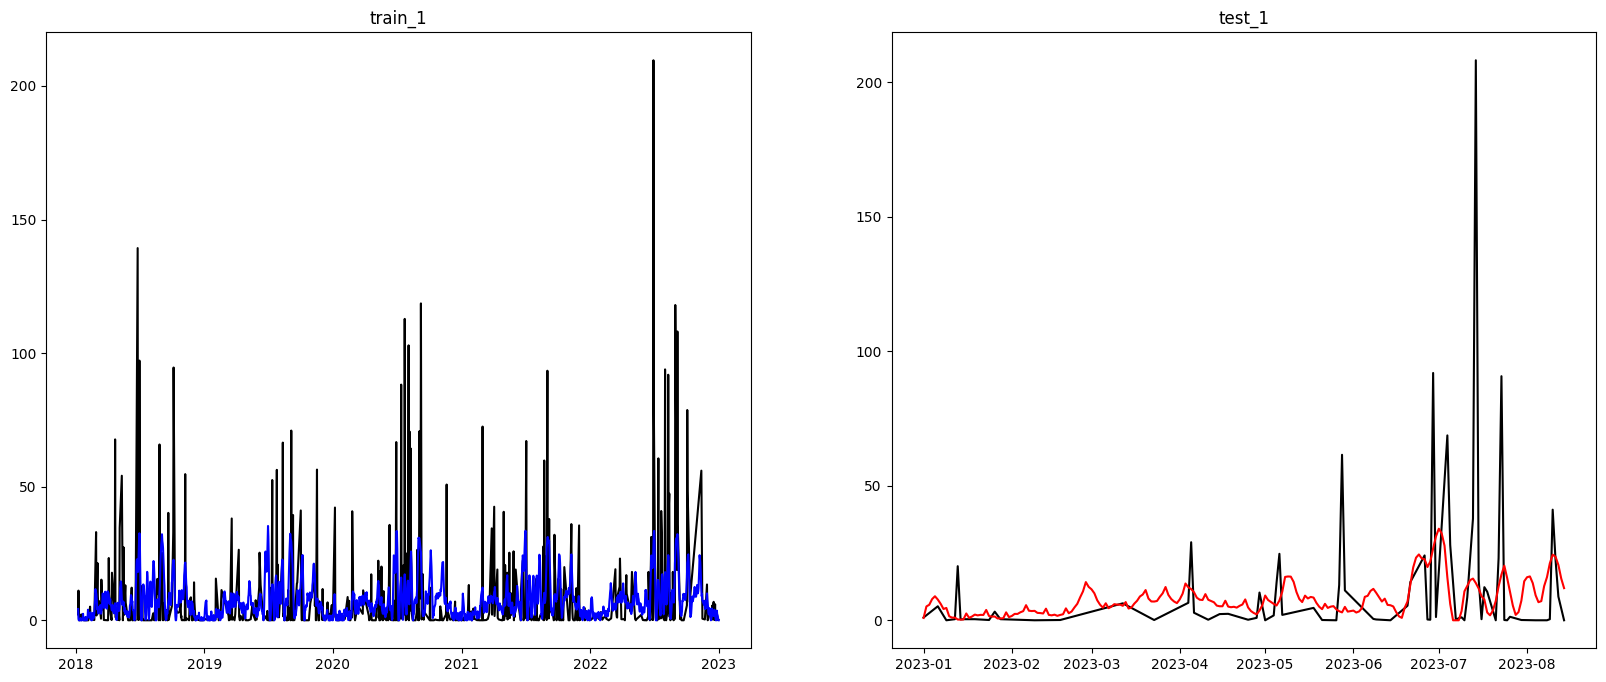

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

plt.figure(figsize=(20,8))

plt.subplot(121)
t = (forecast
    .loc[:, ['ds', 'yhat']]
    .merge(train_1)
)

plt.plot(t['ds'], t['y'], color = 'black')
plt.plot(t['ds'], t['yhat'], color='blue')
plt.title("train_1")

plt.subplot(122)
t = (forecast
    .loc[:, ['ds', 'yhat']]
    .merge(test_1)
)

plt.plot(t['ds'], t['y'], color = 'black')
plt.plot(t['ds'], t['yhat'], color='red')
plt.title("test_1")

print(mean_squared_error(t['y'], t['yhat']))

plt.show()

## 기온

In [ ]:
test_fin = test.copy().reset_index()

In [ ]:
test_fin

,level_0,index,지점,지점명,일시,평균기온(°C),일강수량(mm),평균 상대습도(%),합계 일조시간(hr),합계 일사량(MJ/m2),평균 지면온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),10CM 일 토양수분(%),20CM 일 토양수분(%)
0,1807,1826,129,서산,2023-01-01,-1.2,1.033333,64.5,8.2,10.76,0.1,1.4,1.9,1.033333,23.0,23.0
1,1808,1827,129,서산,2023-01-02,-4.1,1.866667,61.5,8.6,11.23,-0.9,1.1,1.5,1.866667,21.0,23.0
2,1809,1828,129,서산,2023-01-03,-4.8,2.700000,70.4,8.9,12.12,-1.4,1.2,1.7,2.700000,19.0,23.0
3,1810,1829,129,서산,2023-01-04,-1.5,3.533333,71.1,8.5,10.14,0.0,1.2,1.7,3.533333,19.0,23.0
4,1811,1830,129,서산,2023-01-05,-1.3,4.366667,73.9,2.4,6.55,-0.6,0.7,1.0,4.366667,19.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,2028,2047,129,서산,2023-08-10,22.6,41.100000,92.6,0.0,4.50,24.6,1.1,1.6,55.800000,12.0,18.0
222,2029,2048,129,서산,2023-08-11,24.5,22.500000,91.4,0.0,6.99,25.2,1.3,1.9,11.200000,35.0,38.0
223,2030,2049,129,서산,2023-08-12,25.3,8.800000,88.8,4.9,18.87,27.3,3.4,4.9,7.466667,35.0,37.0
224,2031,2050,129,서산,2023-08-13,27.1,4.400000,80.0,9.6,22.98,29.2,4.5,6.4,3.733333,28.0,29.0


In [ ]:
train_2 = train[['일시', '평균기온(°C)']]
test_2 = test[['일시', '평균기온(°C)']]

train_2.columns = ['ds', 'y']
test_2.columns = ['ds', 'y']

In [ ]:
m = Prophet(
    # trend
    changepoint_prior_scale=0.0005,
    # seasonality
    weekly_seasonality=5,
    yearly_seasonality=50,
    daily_seasonality=False
)

m.fit(train_2)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3et92iml/1l2qzte8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3et92iml/ukr_kxjw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54697', 'data', 'file=/tmp/tmp3et92iml/1l2qzte8.json', 'init=/tmp/tmp3et92iml/ukr_kxjw.json', 'output', 'file=/tmp/tmp3et92iml/prophet_model8k1k29t4/prophet_model-20230819142058.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:20:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:20:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:20:58 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3et92iml/fpcykowc.json
DE

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

future = m.make_future_dataframe(periods=len(test_2))
forecast = m.predict(future)
forecast.loc[:, ['ds', 'yhat']]

,ds,yhat
0,2018-01-20,-0.591669
1,2018-01-21,0.436906
2,2018-01-22,0.979117
3,2018-01-23,0.947121
4,2018-01-24,0.473496
...,...,...
2028,2023-08-10,26.765410
2029,2023-08-11,27.061557
2030,2023-08-12,27.551773
2031,2023-08-13,27.698023


8.470993290575688


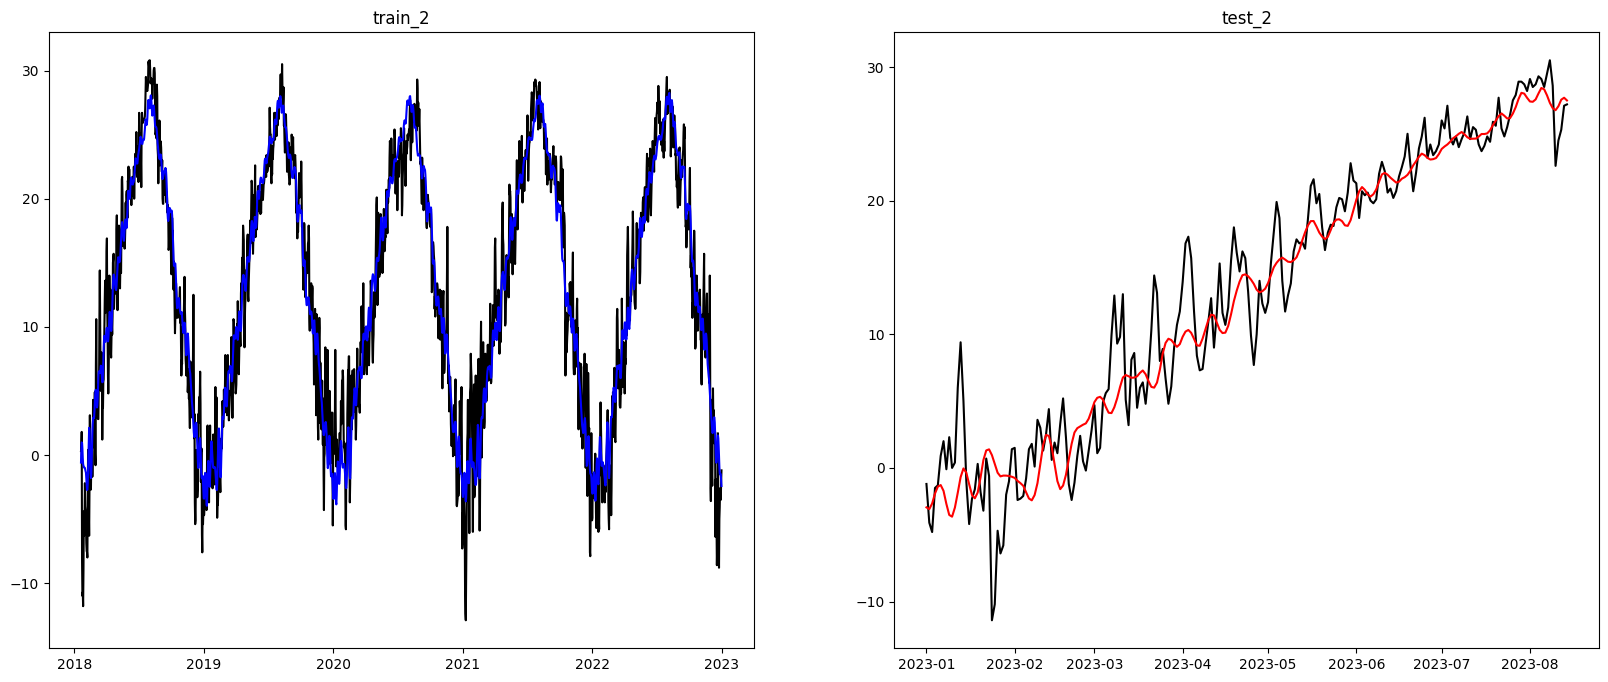

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(121)
t = (forecast
    .loc[:, ['ds', 'yhat']]
    .merge(train_2)
)

plt.plot(t['ds'], t['y'], color = 'black')
plt.plot(t['ds'], t['yhat'], color='blue')
plt.title("train_2")

plt.subplot(122)
t = (forecast
    .loc[:, ['ds', 'yhat']]
    .merge(test_2)
)

plt.plot(t['ds'], t['y'], color = 'black')
plt.plot(t['ds'], t['yhat'], color='red')
plt.title("test_2")

print(mean_squared_error(t['y'], t['yhat']))

plt.show()

In [ ]:
t['yhat']

0      -2.952276
1      -3.083700
2      -2.661942
3      -1.919440
4      -1.399286
         ...    
221    26.765410
222    27.061557
223    27.551773
224    27.698023
225    27.495195
Name: yhat, Length: 226, dtype: float64

In [ ]:
test_fin['평균기온(°C)'] = 0
test_fin['평균기온(°C)'] = t['yhat']
test_fin

,level_0,index,지점,지점명,일시,평균기온(°C),일강수량(mm),평균 상대습도(%),합계 일조시간(hr),합계 일사량(MJ/m2),평균 지면온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),10CM 일 토양수분(%),20CM 일 토양수분(%)
0,1807,1826,129,서산,2023-01-01,-2.952276,1.033333,64.5,8.2,10.76,0.1,1.4,1.9,1.033333,23.0,23.0
1,1808,1827,129,서산,2023-01-02,-3.083700,1.866667,61.5,8.6,11.23,-0.9,1.1,1.5,1.866667,21.0,23.0
2,1809,1828,129,서산,2023-01-03,-2.661942,2.700000,70.4,8.9,12.12,-1.4,1.2,1.7,2.700000,19.0,23.0
3,1810,1829,129,서산,2023-01-04,-1.919440,3.533333,71.1,8.5,10.14,0.0,1.2,1.7,3.533333,19.0,23.0
4,1811,1830,129,서산,2023-01-05,-1.399286,4.366667,73.9,2.4,6.55,-0.6,0.7,1.0,4.366667,19.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,2028,2047,129,서산,2023-08-10,26.765410,41.100000,92.6,0.0,4.50,24.6,1.1,1.6,55.800000,12.0,18.0
222,2029,2048,129,서산,2023-08-11,27.061557,22.500000,91.4,0.0,6.99,25.2,1.3,1.9,11.200000,35.0,38.0
223,2030,2049,129,서산,2023-08-12,27.551773,8.800000,88.8,4.9,18.87,27.3,3.4,4.9,7.466667,35.0,37.0
224,2031,2050,129,서산,2023-08-13,27.698023,4.400000,80.0,9.6,22.98,29.2,4.5,6.4,3.733333,28.0,29.0


## 습도

In [ ]:
train_3 = train[['일시', '평균 상대습도(%)']]
test_3 = test[['일시', '평균 상대습도(%)']]

train_3.columns = ['ds', 'y']
test_3.columns = ['ds', 'y']

In [ ]:
m = Prophet(
    # trend
    changepoint_prior_scale=0.0005,
    # seasonality
    weekly_seasonality=20,
    yearly_seasonality=30,
    daily_seasonality=False
)

m.fit(train_3)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3et92iml/2hisznfp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3et92iml/3818ilbc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3488', 'data', 'file=/tmp/tmp3et92iml/2hisznfp.json', 'init=/tmp/tmp3et92iml/3818ilbc.json', 'output', 'file=/tmp/tmp3et92iml/prophet_modelw21owfus/prophet_model-20230819142338.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:23:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=len(test_1))
forecast = m.predict(future)
forecast.loc[:, ['ds', 'yhat']]
forecast.yhat = np.where(forecast.yhat < 0, 0, forecast.yhat) #0보다는 커야하니까

159.76835528715708


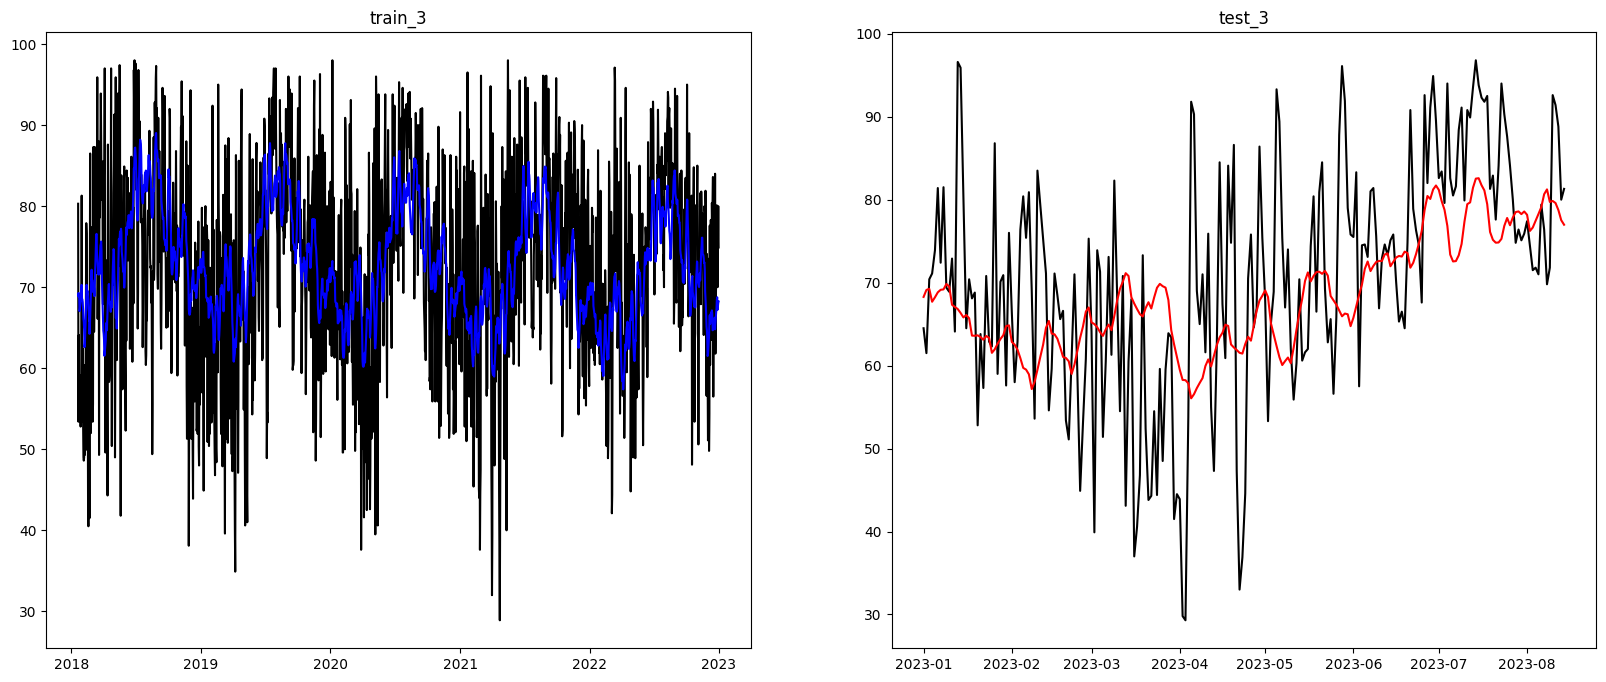

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(121)
t = (forecast
    .loc[:, ['ds', 'yhat']]
    .merge(train_3)
)

plt.plot(t['ds'], t['y'], color = 'black')
plt.plot(t['ds'], t['yhat'], color='blue')
plt.title("train_3")

plt.subplot(122)
t = (forecast
    .loc[:, ['ds', 'yhat']]
    .merge(test_3)
)

plt.plot(t['ds'], t['y'], color = 'black')
plt.plot(t['ds'], t['yhat'], color='red')
plt.title("test_3")

print(mean_squared_error(t['y'], t['yhat']))

plt.show()

In [ ]:
test_fin['평균 상대습도(%)'] = 0
test_fin['평균 상대습도(%)'] = t['yhat']
test_fin

,level_0,index,지점,지점명,일시,평균기온(°C),일강수량(mm),평균 상대습도(%),합계 일조시간(hr),합계 일사량(MJ/m2),평균 지면온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),10CM 일 토양수분(%),20CM 일 토양수분(%)
0,1807,1826,129,서산,2023-01-01,-2.952276,1.033333,68.276416,8.2,10.76,0.1,1.4,1.9,1.033333,23.0,23.0
1,1808,1827,129,서산,2023-01-02,-3.083700,1.866667,69.116551,8.6,11.23,-0.9,1.1,1.5,1.866667,21.0,23.0
2,1809,1828,129,서산,2023-01-03,-2.661942,2.700000,69.251132,8.9,12.12,-1.4,1.2,1.7,2.700000,19.0,23.0
3,1810,1829,129,서산,2023-01-04,-1.919440,3.533333,67.695272,8.5,10.14,0.0,1.2,1.7,3.533333,19.0,23.0
4,1811,1830,129,서산,2023-01-05,-1.399286,4.366667,68.232041,2.4,6.55,-0.6,0.7,1.0,4.366667,19.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,2028,2047,129,서산,2023-08-10,26.765410,41.100000,79.840317,0.0,4.50,24.6,1.1,1.6,55.800000,12.0,18.0
222,2029,2048,129,서산,2023-08-11,27.061557,22.500000,79.593250,0.0,6.99,25.2,1.3,1.9,11.200000,35.0,38.0
223,2030,2049,129,서산,2023-08-12,27.551773,8.800000,78.749178,4.9,18.87,27.3,3.4,4.9,7.466667,35.0,37.0
224,2031,2050,129,서산,2023-08-13,27.698023,4.400000,77.526446,9.6,22.98,29.2,4.5,6.4,3.733333,28.0,29.0


## 일사량

In [ ]:
train_4 = train[['일시', '합계 일사량(MJ/m2)']]
test_4 = test[['일시', '합계 일사량(MJ/m2)']]

train_4.columns = ['ds', 'y']
test_4.columns = ['ds', 'y']

In [ ]:
m = Prophet(
    # trend
    changepoint_prior_scale=0.0005,
    # seasonality
    weekly_seasonality=5,
    yearly_seasonality=50,
    daily_seasonality=False
)

m.fit(train_4)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3et92iml/vxd65upl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3et92iml/vkxv_nvf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45869', 'data', 'file=/tmp/tmp3et92iml/vxd65upl.json', 'init=/tmp/tmp3et92iml/vkxv_nvf.json', 'output', 'file=/tmp/tmp3et92iml/prophet_modelb1r_tue1/prophet_model-20230819142452.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:24:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:24:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=len(test_1))
forecast = m.predict(future)
forecast.loc[:, ['ds', 'yhat']]
forecast.yhat = np.where(forecast.yhat < 0, 0, forecast.yhat) #0보다는 커야하니까

52.23070302105549


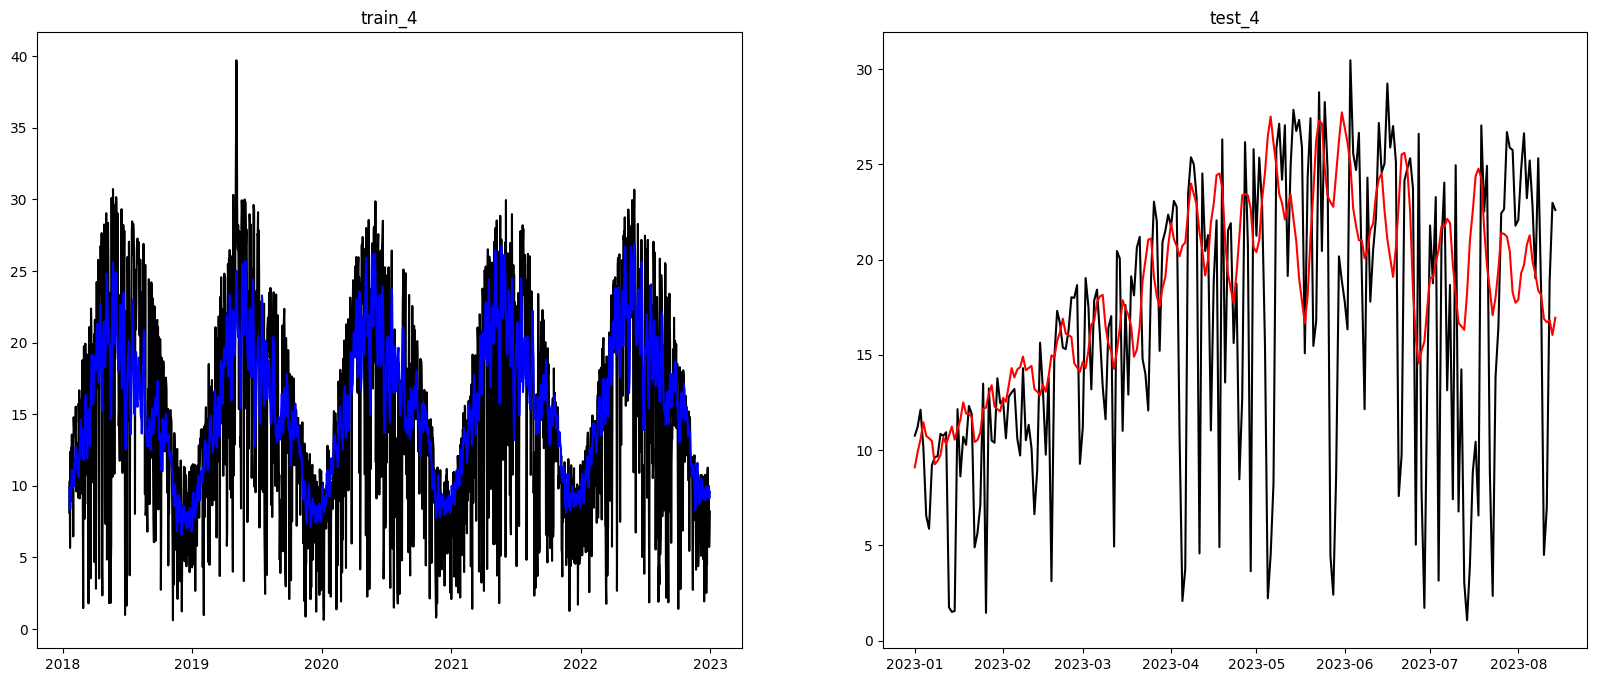

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(121)
t = (forecast
    .loc[:, ['ds', 'yhat']]
    .merge(train_4)
)

plt.plot(t['ds'], t['y'], color = 'black')
plt.plot(t['ds'], t['yhat'], color='blue')
plt.title("train_4")

plt.subplot(122)
t = (forecast
    .loc[:, ['ds', 'yhat']]
    .merge(test_4)
)

plt.plot(t['ds'], t['y'], color = 'black')
plt.plot(t['ds'], t['yhat'], color='red')
plt.title("test_4")

print(mean_squared_error(t['y'], t['yhat']))

plt.show()

In [ ]:
test_fin['합계 일사량(MJ/m2)'] = 0
test_fin['합계 일사량(MJ/m2)'] = t['yhat']
test_fin

,level_0,index,지점,지점명,일시,평균기온(°C),일강수량(mm),평균 상대습도(%),합계 일조시간(hr),합계 일사량(MJ/m2),평균 지면온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),10CM 일 토양수분(%),20CM 일 토양수분(%)
0,1807,1826,129,서산,2023-01-01,-2.952276,1.033333,68.276416,8.2,9.099302,0.1,1.4,1.9,1.033333,23.0,23.0
1,1808,1827,129,서산,2023-01-02,-3.083700,1.866667,69.116551,8.6,9.913448,-0.9,1.1,1.5,1.866667,21.0,23.0
2,1809,1828,129,서산,2023-01-03,-2.661942,2.700000,69.251132,8.9,10.565343,-1.4,1.2,1.7,2.700000,19.0,23.0
3,1810,1829,129,서산,2023-01-04,-1.919440,3.533333,67.695272,8.5,11.460911,0.0,1.2,1.7,3.533333,19.0,23.0
4,1811,1830,129,서산,2023-01-05,-1.399286,4.366667,68.232041,2.4,10.748959,-0.6,0.7,1.0,4.366667,19.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,2028,2047,129,서산,2023-08-10,26.765410,41.100000,79.840317,0.0,16.897386,24.6,1.1,1.6,55.800000,12.0,18.0
222,2029,2048,129,서산,2023-08-11,27.061557,22.500000,79.593250,0.0,16.707440,25.2,1.3,1.9,11.200000,35.0,38.0
223,2030,2049,129,서산,2023-08-12,27.551773,8.800000,78.749178,4.9,16.806929,27.3,3.4,4.9,7.466667,35.0,37.0
224,2031,2050,129,서산,2023-08-13,27.698023,4.400000,77.526446,9.6,16.041895,29.2,4.5,6.4,3.733333,28.0,29.0


## 대형 증발량

In [ ]:
train_5 = train[['일시', '합계 대형증발량(mm)']]
test_5 = test[['일시', '합계 대형증발량(mm)']]

train_5.columns = ['ds', 'y']
test_5.columns = ['ds', 'y']

In [ ]:
m = Prophet(
    # trend
    changepoint_prior_scale=0.0005,
    # seasonality
    weekly_seasonality=5,
    yearly_seasonality=50,
    daily_seasonality=False
)

m.fit(train_5)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3et92iml/tpst26a7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3et92iml/wvilpw7l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21187', 'data', 'file=/tmp/tmp3et92iml/tpst26a7.json', 'init=/tmp/tmp3et92iml/wvilpw7l.json', 'output', 'file=/tmp/tmp3et92iml/prophet_modelhjs3xcjt/prophet_model-20230819142741.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:27:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:27:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:27:41 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3et92iml/qyjavttc.json
DE

In [ ]:
future = m.make_future_dataframe(periods=len(test_1))
forecast = m.predict(future)
forecast.loc[:, ['ds', 'yhat']]
forecast.yhat = np.where(forecast.yhat < 0, 0, forecast.yhat) #0보다는 커야하니까

1.619786577292051


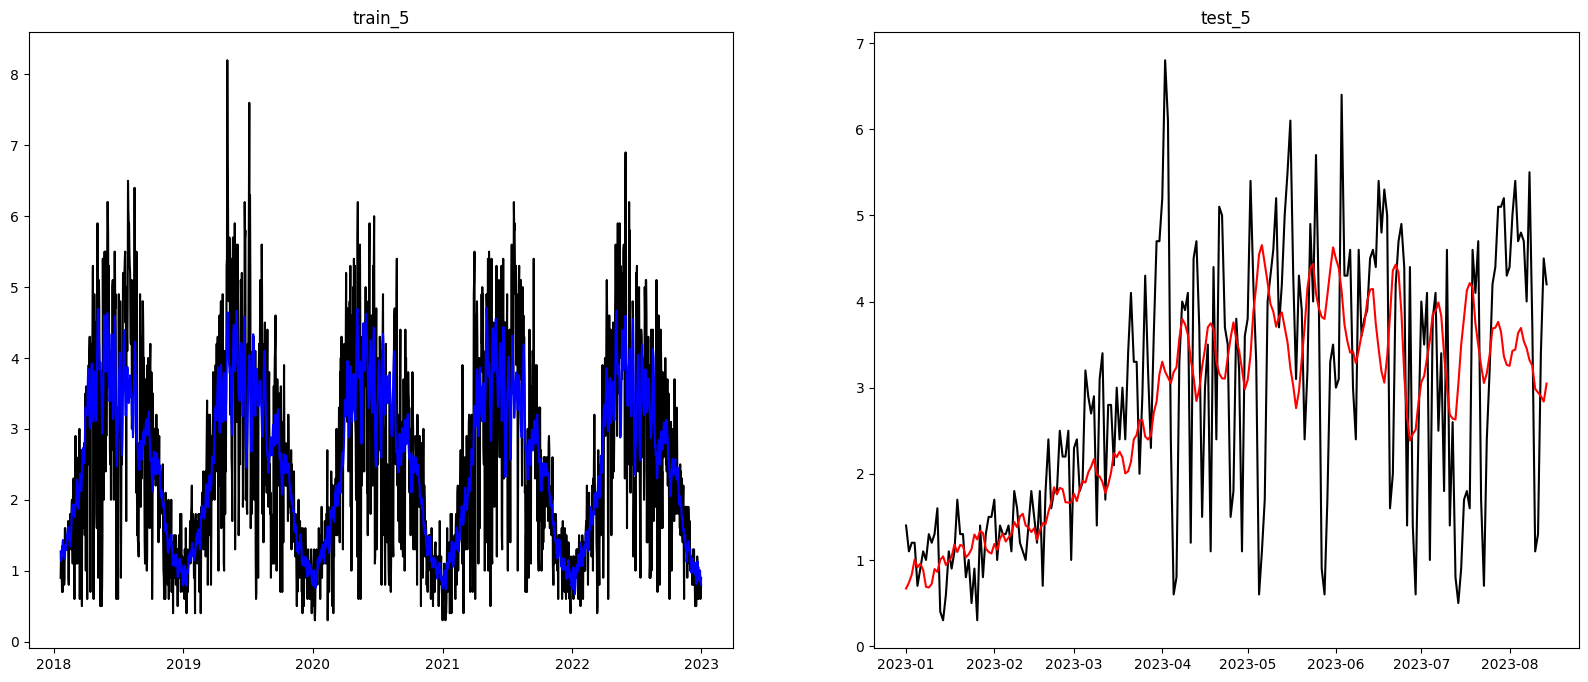

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(121)
t = (forecast
    .loc[:, ['ds', 'yhat']]
    .merge(train_5)
)

plt.plot(t['ds'], t['y'], color = 'black')
plt.plot(t['ds'], t['yhat'], color='blue')
plt.title("train_5")

plt.subplot(122)
t = (forecast
    .loc[:, ['ds', 'yhat']]
    .merge(test_5)
)

plt.plot(t['ds'], t['y'], color = 'black')
plt.plot(t['ds'], t['yhat'], color='red')
plt.title("test_5")

print(mean_squared_error(t['y'], t['yhat']))

plt.show()

In [ ]:
test_fin['합계 대형증발량(mm)'] = 0
test_fin['합계 대형증발량(mm)'] = t['yhat']
test_fin

,level_0,index,지점,지점명,일시,평균기온(°C),일강수량(mm),평균 상대습도(%),합계 일조시간(hr),합계 일사량(MJ/m2),평균 지면온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),10CM 일 토양수분(%),20CM 일 토양수분(%)
0,1807,1826,129,서산,2023-01-01,-2.952276,1.033333,68.276416,8.2,9.099302,0.1,0.668611,1.9,1.033333,23.0,23.0
1,1808,1827,129,서산,2023-01-02,-3.083700,1.866667,69.116551,8.6,9.913448,-0.9,0.735645,1.5,1.866667,21.0,23.0
2,1809,1828,129,서산,2023-01-03,-2.661942,2.700000,69.251132,8.9,10.565343,-1.4,0.830125,1.7,2.700000,19.0,23.0
3,1810,1829,129,서산,2023-01-04,-1.919440,3.533333,67.695272,8.5,11.460911,0.0,1.004757,1.7,3.533333,19.0,23.0
4,1811,1830,129,서산,2023-01-05,-1.399286,4.366667,68.232041,2.4,10.748959,-0.6,0.916322,1.0,4.366667,19.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,2028,2047,129,서산,2023-08-10,26.765410,41.100000,79.840317,0.0,16.897386,24.6,2.985731,1.6,55.800000,12.0,18.0
222,2029,2048,129,서산,2023-08-11,27.061557,22.500000,79.593250,0.0,16.707440,25.2,2.944310,1.9,11.200000,35.0,38.0
223,2030,2049,129,서산,2023-08-12,27.551773,8.800000,78.749178,4.9,16.806929,27.3,2.901396,4.9,7.466667,35.0,37.0
224,2031,2050,129,서산,2023-08-13,27.698023,4.400000,77.526446,9.6,16.041895,29.2,2.838934,6.4,3.733333,28.0,29.0


## 소형 증발량

In [ ]:
train_6 = train[['일시', '합계 소형증발량(mm)']]
test_6 = test[['일시', '합계 소형증발량(mm)']]

train_6.columns = ['ds', 'y']
test_6.columns = ['ds', 'y']

In [ ]:
m = Prophet(
    # trend
    changepoint_prior_scale=0.0005,
    # seasonality
    weekly_seasonality=5,
    yearly_seasonality=50,
    daily_seasonality=False
)

m.fit(train_6)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3et92iml/cw3g9p5d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3et92iml/qh3ltata.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7679', 'data', 'file=/tmp/tmp3et92iml/cw3g9p5d.json', 'init=/tmp/tmp3et92iml/qh3ltata.json', 'output', 'file=/tmp/tmp3et92iml/prophet_modelm6jnr_fn/prophet_model-20230819142908.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:29:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:29:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:29:08 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3et92iml/degz4qxv.json
DEB

In [ ]:
future = m.make_future_dataframe(periods=len(test_1))
forecast = m.predict(future)
forecast.loc[:, ['ds', 'yhat']]
forecast.yhat = np.where(forecast.yhat < 0, 0, forecast.yhat) #0보다는 커야하니까

3.32342537495183


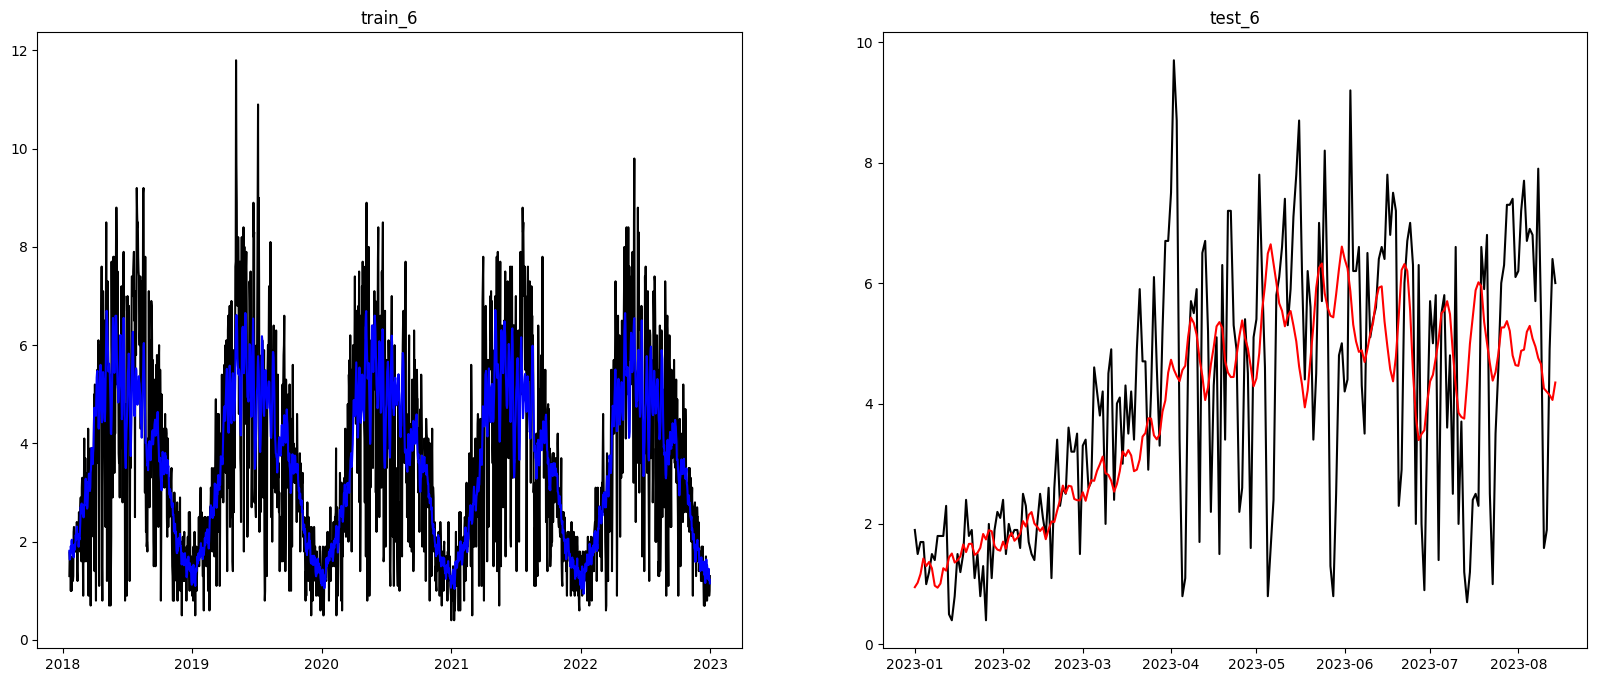

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(121)
t = (forecast
    .loc[:, ['ds', 'yhat']]
    .merge(train_6)
)

plt.plot(t['ds'], t['y'], color = 'black')
plt.plot(t['ds'], t['yhat'], color='blue')
plt.title("train_6")

plt.subplot(122)
t = (forecast
    .loc[:, ['ds', 'yhat']]
    .merge(test_6)
)

plt.plot(t['ds'], t['y'], color = 'black')
plt.plot(t['ds'], t['yhat'], color='red')
plt.title("test_6")

print(mean_squared_error(t['y'], t['yhat']))

plt.show()

In [ ]:
test_fin['합계 소형증발량(mm)'] = 0
test_fin['합계 소형증발량(mm)'] = t['yhat']
test_fin

,level_0,index,지점,지점명,일시,평균기온(°C),일강수량(mm),평균 상대습도(%),합계 일조시간(hr),합계 일사량(MJ/m2),평균 지면온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),10CM 일 토양수분(%),20CM 일 토양수분(%)
0,1807,1826,129,서산,2023-01-01,-2.952276,1.033333,68.276416,8.2,9.099302,0.1,0.668611,0.949807,1.033333,23.0,23.0
1,1808,1827,129,서산,2023-01-02,-3.083700,1.866667,69.116551,8.6,9.913448,-0.9,0.735645,1.024130,1.866667,21.0,23.0
2,1809,1828,129,서산,2023-01-03,-2.661942,2.700000,69.251132,8.9,10.565343,-1.4,0.830125,1.169569,2.700000,19.0,23.0
3,1810,1829,129,서산,2023-01-04,-1.919440,3.533333,67.695272,8.5,11.460911,0.0,1.004757,1.426278,3.533333,19.0,23.0
4,1811,1830,129,서산,2023-01-05,-1.399286,4.366667,68.232041,2.4,10.748959,-0.6,0.916322,1.300534,4.366667,19.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,2028,2047,129,서산,2023-08-10,26.765410,41.100000,79.840317,0.0,16.897386,24.6,2.985731,4.250243,55.800000,12.0,18.0
222,2029,2048,129,서산,2023-08-11,27.061557,22.500000,79.593250,0.0,16.707440,25.2,2.944310,4.195561,11.200000,35.0,38.0
223,2030,2049,129,서산,2023-08-12,27.551773,8.800000,78.749178,4.9,16.806929,27.3,2.901396,4.140353,7.466667,35.0,37.0
224,2031,2050,129,서산,2023-08-13,27.698023,4.400000,77.526446,9.6,16.041895,29.2,2.838934,4.058925,3.733333,28.0,29.0


## 일조시간

In [ ]:
train_6 = train[['일시', '합계 일조시간(hr)']]
test_6 = test[['일시', '합계 일조시간(hr)']]

train_6.columns = ['ds', 'y']
test_6.columns = ['ds', 'y']

In [ ]:
m = Prophet(
    # trend
    changepoint_prior_scale=0.0005,
    # seasonality
    weekly_seasonality=1,
    yearly_seasonality=50,
    daily_seasonality=False
)

m.fit(train_6)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3et92iml/bkmwrlvj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3et92iml/j1kl7tww.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58578', 'data', 'file=/tmp/tmp3et92iml/bkmwrlvj.json', 'init=/tmp/tmp3et92iml/j1kl7tww.json', 'output', 'file=/tmp/tmp3et92iml/prophet_model0etarduq/prophet_model-20230819143609.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:36:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:36:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=len(test_1))
forecast = m.predict(future)
forecast.loc[:, ['ds', 'yhat']]
forecast.yhat = np.where(forecast.yhat < 0, 0, forecast.yhat) #0보다는 커야하니까

17.269054784131335


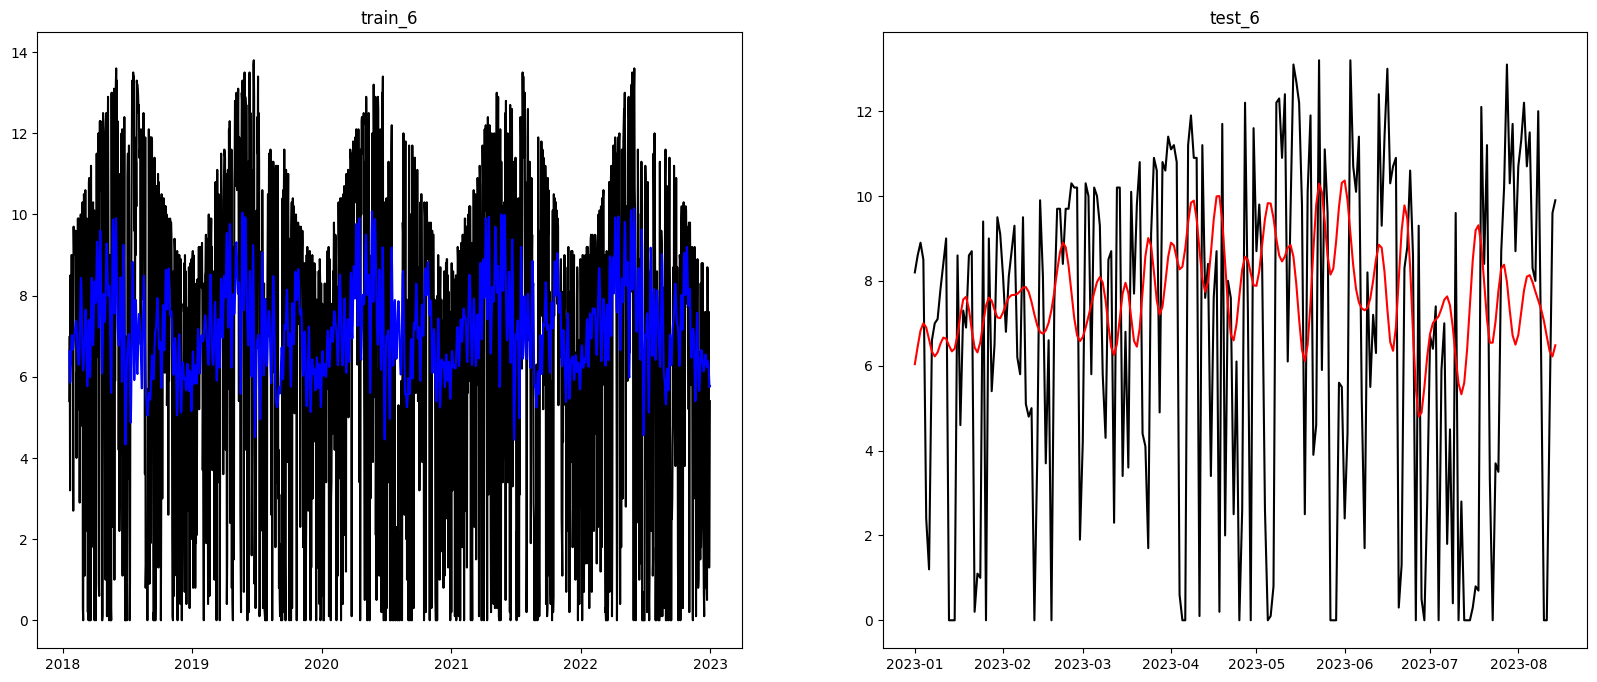

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(121)
t = (forecast
    .loc[:, ['ds', 'yhat']]
    .merge(train_6)
)

plt.plot(t['ds'], t['y'], color = 'black')
plt.plot(t['ds'], t['yhat'], color='blue')
plt.title("train_6")

plt.subplot(122)
t = (forecast
    .loc[:, ['ds', 'yhat']]
    .merge(test_6)
)

plt.plot(t['ds'], t['y'], color = 'black')
plt.plot(t['ds'], t['yhat'], color='red')
plt.title("test_6")

print(mean_squared_error(t['y'], t['yhat']))

plt.show()

In [ ]:
test_fin['합계 일조시간(hr)'] = 0
test_fin['합계 일조시간(hr)'] = t['yhat']
test_fin

,level_0,index,지점,지점명,일시,평균기온(°C),일강수량(mm),평균 상대습도(%),합계 일조시간(hr),합계 일사량(MJ/m2),평균 지면온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),10CM 일 토양수분(%),20CM 일 토양수분(%)
0,1807,1826,129,서산,2023-01-01,-2.952276,1.033333,68.276416,6.037466,9.099302,0.1,0.668611,0.949807,1.033333,23.0,23.0
1,1808,1827,129,서산,2023-01-02,-3.083700,1.866667,69.116551,6.449565,9.913448,-0.9,0.735645,1.024130,1.866667,21.0,23.0
2,1809,1828,129,서산,2023-01-03,-2.661942,2.700000,69.251132,6.829171,10.565343,-1.4,0.830125,1.169569,2.700000,19.0,23.0
3,1810,1829,129,서산,2023-01-04,-1.919440,3.533333,67.695272,7.001416,11.460911,0.0,1.004757,1.426278,3.533333,19.0,23.0
4,1811,1830,129,서산,2023-01-05,-1.399286,4.366667,68.232041,6.902171,10.748959,-0.6,0.916322,1.300534,4.366667,19.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,2028,2047,129,서산,2023-08-10,26.765410,41.100000,79.840317,7.056234,16.897386,24.6,2.985731,4.250243,55.800000,12.0,18.0
222,2029,2048,129,서산,2023-08-11,27.061557,22.500000,79.593250,6.690304,16.707440,25.2,2.944310,4.195561,11.200000,35.0,38.0
223,2030,2049,129,서산,2023-08-12,27.551773,8.800000,78.749178,6.345333,16.806929,27.3,2.901396,4.140353,7.466667,35.0,37.0
224,2031,2050,129,서산,2023-08-13,27.698023,4.400000,77.526446,6.219459,16.041895,29.2,2.838934,4.058925,3.733333,28.0,29.0


## 지면온도

In [ ]:
train_6 = train[['일시', '평균 지면온도(°C)']]
test_6 = test[['일시', '평균 지면온도(°C)']]

train_6.columns = ['ds', 'y']
test_6.columns = ['ds', 'y']

In [ ]:
m = Prophet(
    # trend
    changepoint_prior_scale=0.0005,
    # seasonality
    weekly_seasonality=5,
    yearly_seasonality=50,
    daily_seasonality=False
)

m.fit(train_6)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3et92iml/955lae3l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3et92iml/73kon4io.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58080', 'data', 'file=/tmp/tmp3et92iml/955lae3l.json', 'init=/tmp/tmp3et92iml/73kon4io.json', 'output', 'file=/tmp/tmp3et92iml/prophet_model31e6g9w3/prophet_model-20230819143716.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:37:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:37:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
14:37:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3et92iml/rbiz0fv7.json
DE

In [ ]:
future = m.make_future_dataframe(periods=len(test_1))
forecast = m.predict(future)
forecast.loc[:, ['ds', 'yhat']]
# forecast.yhat = np.where(forecast.yhat < 0, 0, forecast.yhat) #0보다는 커야하니까

,ds,yhat
0,2018-01-20,0.022474
1,2018-01-21,0.519709
2,2018-01-22,1.042498
3,2018-01-23,1.325378
4,2018-01-24,1.561898
...,...,...
2028,2023-08-10,30.440158
2029,2023-08-11,30.438406
2030,2023-08-12,30.738183
2031,2023-08-13,30.920667


7.727665431376372


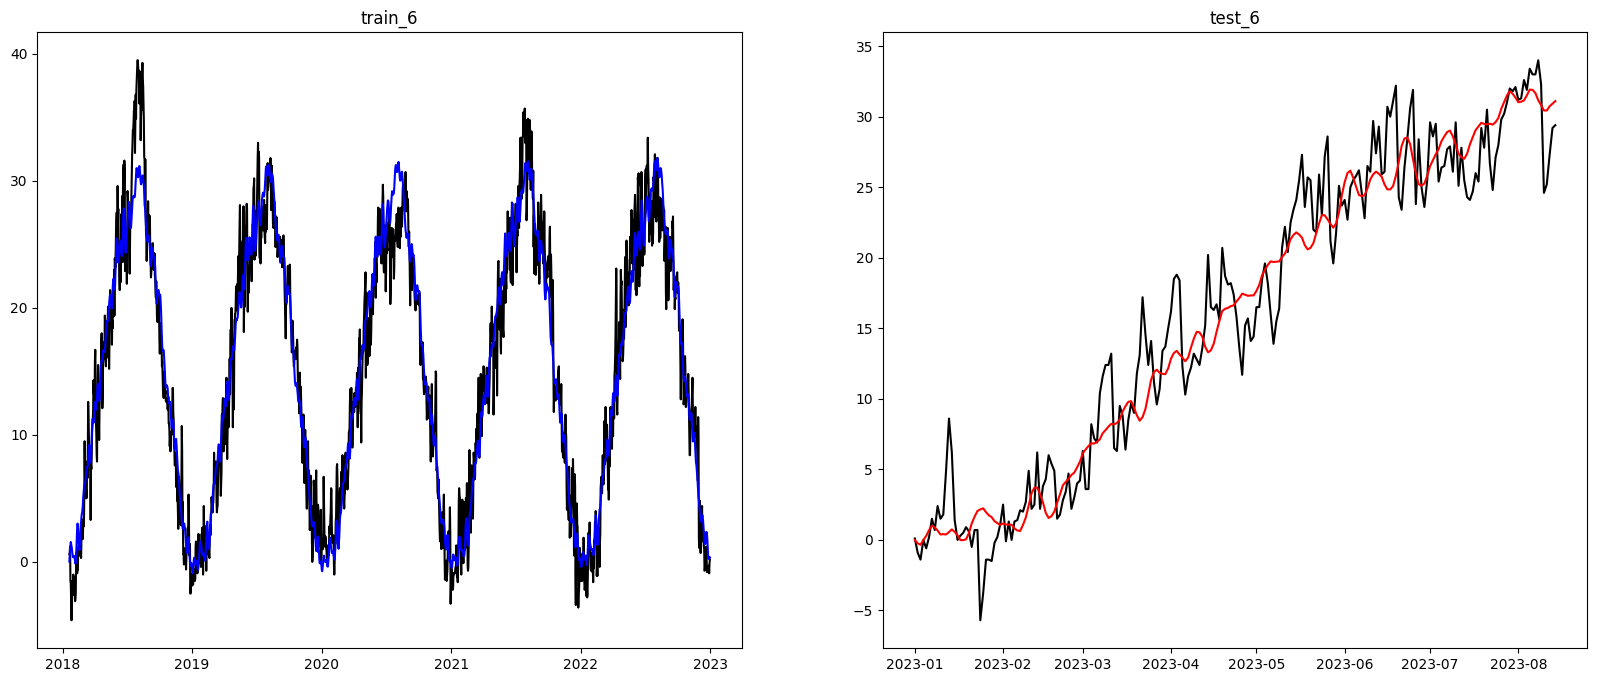

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(121)
t = (forecast
    .loc[:, ['ds', 'yhat']]
    .merge(train_6)
)

plt.plot(t['ds'], t['y'], color = 'black')
plt.plot(t['ds'], t['yhat'], color='blue')
plt.title("train_6")

plt.subplot(122)
t = (forecast
    .loc[:, ['ds', 'yhat']]
    .merge(test_6)
)

plt.plot(t['ds'], t['y'], color = 'black')
plt.plot(t['ds'], t['yhat'], color='red')
plt.title("test_6")

print(mean_squared_error(t['y'], t['yhat']))

plt.show()

In [ ]:
test_fin['평균 지면온도(°C)'] = 0
test_fin['평균 지면온도(°C)'] = t['yhat']
test_fin

,level_0,index,지점,지점명,일시,평균기온(°C),일강수량(mm),평균 상대습도(%),합계 일조시간(hr),합계 일사량(MJ/m2),평균 지면온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),10CM 일 토양수분(%),20CM 일 토양수분(%)
0,1807,1826,129,서산,2023-01-01,-2.952276,1.033333,68.276416,6.037466,9.099302,-0.009035,0.668611,0.949807,1.033333,23.0,23.0
1,1808,1827,129,서산,2023-01-02,-3.083700,1.866667,69.116551,6.449565,9.913448,-0.244483,0.735645,1.024130,1.866667,21.0,23.0
2,1809,1828,129,서산,2023-01-03,-2.661942,2.700000,69.251132,6.829171,10.565343,-0.344570,0.830125,1.169569,2.700000,19.0,23.0
3,1810,1829,129,서산,2023-01-04,-1.919440,3.533333,67.695272,7.001416,11.460911,-0.012680,1.004757,1.426278,3.533333,19.0,23.0
4,1811,1830,129,서산,2023-01-05,-1.399286,4.366667,68.232041,6.902171,10.748959,0.283627,0.916322,1.300534,4.366667,19.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,2028,2047,129,서산,2023-08-10,26.765410,41.100000,79.840317,7.056234,16.897386,30.440158,2.985731,4.250243,55.800000,12.0,18.0
222,2029,2048,129,서산,2023-08-11,27.061557,22.500000,79.593250,6.690304,16.707440,30.438406,2.944310,4.195561,11.200000,35.0,38.0
223,2030,2049,129,서산,2023-08-12,27.551773,8.800000,78.749178,6.345333,16.806929,30.738183,2.901396,4.140353,7.466667,35.0,37.0
224,2031,2050,129,서산,2023-08-13,27.698023,4.400000,77.526446,6.219459,16.041895,30.920667,2.838934,4.058925,3.733333,28.0,29.0


## 10cm 지습

In [ ]:
train_6 = train[['일시', '20CM 일 토양수분(%)']]
test_6 = test[['일시', '20CM 일 토양수분(%)']]

train_6.columns = ['ds', 'y']
test_6.columns = ['ds', 'y']

In [ ]:
m = Prophet(
    # trend
    changepoint_prior_scale=0.0005,
    # seasonality
    weekly_seasonality=40,
    yearly_seasonality=10,
    daily_seasonality=20
)

m.fit(train_6)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3et92iml/yvz7ucvf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3et92iml/kdb65bcl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16921', 'data', 'file=/tmp/tmp3et92iml/yvz7ucvf.json', 'init=/tmp/tmp3et92iml/kdb65bcl.json', 'output', 'file=/tmp/tmp3et92iml/prophet_modelh066xyq0/prophet_model-20230819145300.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:53:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:53:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=len(test_1))
forecast = m.predict(future)
forecast.loc[:, ['ds', 'yhat']]
forecast.yhat = np.where(forecast.yhat < 0, 0, forecast.yhat) #0보다는 커야하니까

25.492509761599273


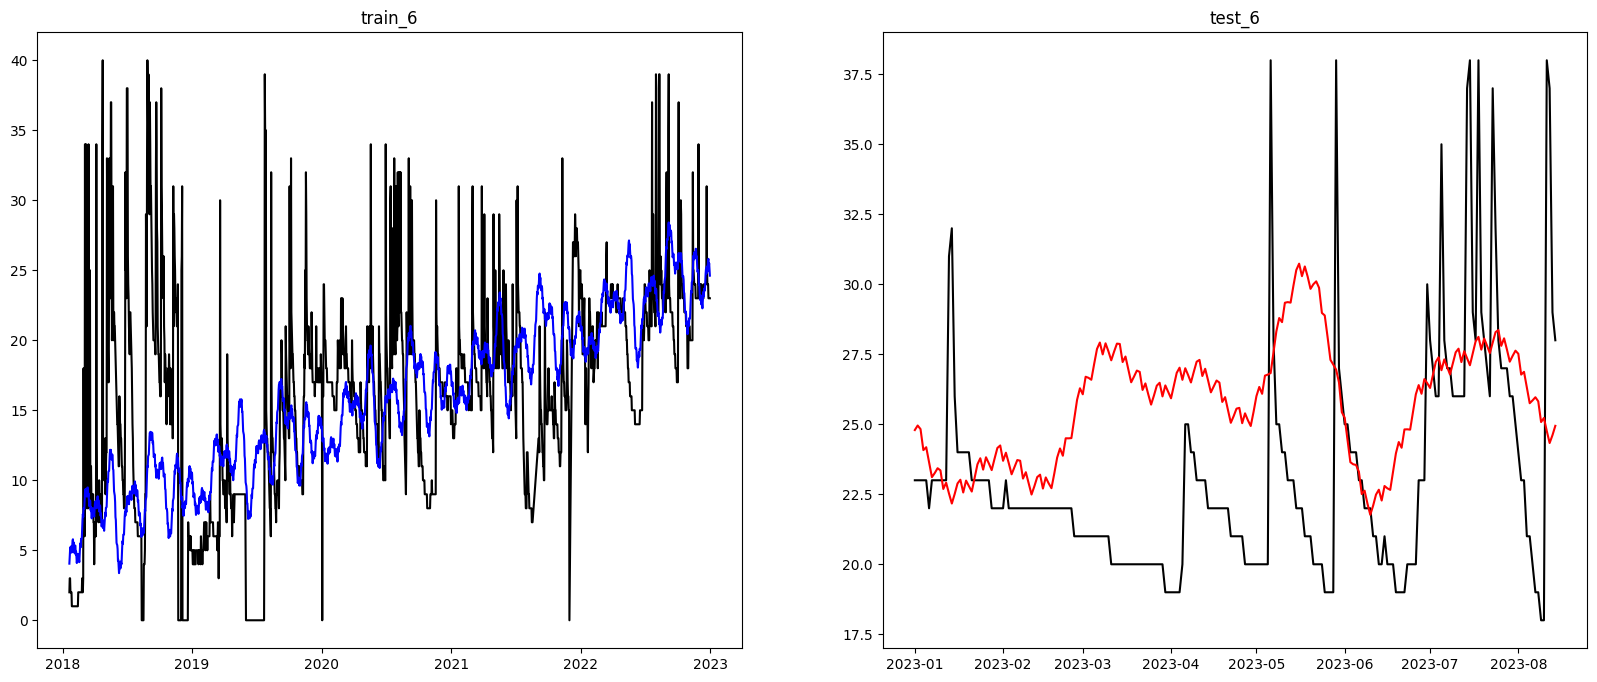

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(121)
t = (forecast
    .loc[:, ['ds', 'yhat']]
    .merge(train_6)
)

plt.plot(t['ds'], t['y'], color = 'black')
plt.plot(t['ds'], t['yhat'], color='blue')
plt.title("train_6")

plt.subplot(122)
t = (forecast
    .loc[:, ['ds', 'yhat']]
    .merge(test_6)
)

plt.plot(t['ds'], t['y'], color = 'black')
plt.plot(t['ds'], t['yhat'], color='red')
plt.title("test_6")

print(mean_squared_error(t['y'], t['yhat']))

plt.show()

In [ ]:
test_fin['20CM 일 토양수분(%)'] = 0
test_fin['20CM 일 토양수분(%)'] = t['yhat']
test_fin

,level_0,index,지점,지점명,일시,평균기온(°C),일강수량(mm),평균 상대습도(%),합계 일조시간(hr),합계 일사량(MJ/m2),평균 지면온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),10CM 일 토양수분(%),20CM 일 토양수분(%)
0,1807,1826,129,서산,2023-01-01,-2.952276,1.033333,68.276416,6.037466,9.099302,-0.009035,0.668611,0.949807,1.033333,23.0,24.793960
1,1808,1827,129,서산,2023-01-02,-3.083700,1.866667,69.116551,6.449565,9.913448,-0.244483,0.735645,1.024130,1.866667,21.0,24.955490
2,1809,1828,129,서산,2023-01-03,-2.661942,2.700000,69.251132,6.829171,10.565343,-0.344570,0.830125,1.169569,2.700000,19.0,24.828422
3,1810,1829,129,서산,2023-01-04,-1.919440,3.533333,67.695272,7.001416,11.460911,-0.012680,1.004757,1.426278,3.533333,19.0,24.077289
4,1811,1830,129,서산,2023-01-05,-1.399286,4.366667,68.232041,6.902171,10.748959,0.283627,0.916322,1.300534,4.366667,19.0,24.180946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,2028,2047,129,서산,2023-08-10,26.765410,41.100000,79.840317,7.056234,16.897386,30.440158,2.985731,4.250243,55.800000,12.0,25.224945
222,2029,2048,129,서산,2023-08-11,27.061557,22.500000,79.593250,6.690304,16.707440,30.438406,2.944310,4.195561,11.200000,35.0,24.760539
223,2030,2049,129,서산,2023-08-12,27.551773,8.800000,78.749178,6.345333,16.806929,30.738183,2.901396,4.140353,7.466667,35.0,24.330489
224,2031,2050,129,서산,2023-08-13,27.698023,4.400000,77.526446,6.219459,16.041895,30.920667,2.838934,4.058925,3.733333,28.0,24.610923


In [ ]:
test_set = test_fin.drop(columns=['level_0', 'index', '일강수량(mm)', '9-9강수(mm)', '10CM 일 토양수분(%)'])
test_set

,지점,지점명,일시,평균기온(°C),평균 상대습도(%),합계 일조시간(hr),합계 일사량(MJ/m2),평균 지면온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),20CM 일 토양수분(%)
0,129,서산,2023-01-01,-2.952276,68.276416,6.037466,9.099302,-0.009035,0.668611,0.949807,24.793960
1,129,서산,2023-01-02,-3.083700,69.116551,6.449565,9.913448,-0.244483,0.735645,1.024130,24.955490
2,129,서산,2023-01-03,-2.661942,69.251132,6.829171,10.565343,-0.344570,0.830125,1.169569,24.828422
3,129,서산,2023-01-04,-1.919440,67.695272,7.001416,11.460911,-0.012680,1.004757,1.426278,24.077289
4,129,서산,2023-01-05,-1.399286,68.232041,6.902171,10.748959,0.283627,0.916322,1.300534,24.180946
...,...,...,...,...,...,...,...,...,...,...,...
221,129,서산,2023-08-10,26.765410,79.840317,7.056234,16.897386,30.440158,2.985731,4.250243,25.224945
222,129,서산,2023-08-11,27.061557,79.593250,6.690304,16.707440,30.438406,2.944310,4.195561,24.760539
223,129,서산,2023-08-12,27.551773,78.749178,6.345333,16.806929,30.738183,2.901396,4.140353,24.330489
224,129,서산,2023-08-13,27.698023,77.526446,6.219459,16.041895,30.920667,2.838934,4.058925,24.610923


In [ ]:
test_set.to_csv("/content/drive/MyDrive/물공모전/test_data.csv")

### 가을무우, 사과, 봄감자에 대해 test 데이터 만들기

In [ ]:
df=pd.read_csv('C:\\Users\\USER\\OneDrive\\바탕 화면\\k-water\\test_data.csv')
df

### 가을무우

In [ ]:
G1_2023 =df.loc[df["일시"].between('2023-08-25', '2023-09-10')]
G2_2023 =df.loc[df["일시"].between('2023-09-11', '2023-10-10')]
G3_2023 =df.loc[df["일시"].between('2023-10-11', '2023-11-05')]

G1_2023['생육단계']='G1'
G2_2023['생육단계']='G2'
G3_2023['생육단계']='G3'

fall_radish=pd.concat([G1_2023,G2_2023,G3_2023],axis=0)

fall_radish['1회 관개량']=0

radish1=fall_radish.copy()
radish2=fall_radish.copy()
radish3=fall_radish.copy()
radish4=fall_radish.copy()
radish5=fall_radish.copy()
radish6=fall_radish.copy()

radish1['토성']='미사질식양토'
radish2['토성']='미사질양토'
radish3['토성']='사양토'
radish4['토성']='사질식양토'
radish5['토성']='식양토'
radish6['토성']='양토'

radish1['1회 관개량'][radish1['생육단계']=='G1']=14.75
radish1['1회 관개량'][radish1['생육단계']=='G2']=26.68
radish1['1회 관개량'][radish1['생육단계']=='G3']=36.58

radish2['1회 관개량'][radish2['생육단계']=='G1']=16.48
radish2['1회 관개량'][radish2['생육단계']=='G2']=29.82
radish2['1회 관개량'][radish2['생육단계']=='G3']=40.89

radish3['1회 관개량'][radish3['생육단계']=='G1']=10.68
radish3['1회 관개량'][radish3['생육단계']=='G2']=19.31
radish3['1회 관개량'][radish3['생육단계']=='G3']=26.49

radish4['1회 관개량'][radish4['생육단계']=='G1']=11.14
radish4['1회 관개량'][radish4['생육단계']=='G2']=20.16
radish4['1회 관개량'][radish4['생육단계']=='G3']=27.64

radish5['1회 관개량'][radish5['생육단계']=='G1']=13.48
radish5['1회 관개량'][radish5['생육단계']=='G2']=24.38
radish5['1회 관개량'][radish5['생육단계']=='G3']=33.44

radish6['1회 관개량'][radish6['생육단계']=='G1']=5.16
radish6['1회 관개량'][radish6['생육단계']=='G2']=7.72
radish6['1회 관개량'][radish6['생육단계']=='G3']=13.92

radish=pd.concat([radish1,radish2,radish3,radish4,radish5,radish6],axis=0)

radish['작물']='가을무우'

### 사과

In [ ]:
G1_2023 =df.loc[df["일시"].between('2023-04-01', '2023-04-30')]
G2_2023 =df.loc[df["일시"].between('2023-05-01', '2023-06-10')]
G3_2023 =df.loc[df["일시"].between('2023-06-11', '2023-06-30')]
G4_2023 =df.loc[df["일시"].between('2023-07-01', '2023-08-20')]

G1_2023['생육단계']='G1'
G2_2023['생육단계']='G2'
G3_2023['생육단계']='G3'
G4_2023['생육단계']='G4'

fall_apple=pd.concat([G1_2023,G2_2023,G3_2023,G4_2023],axis=0)

fall_apple['1회 관개량']=0

apple1=fall_apple.copy()
apple2=fall_apple.copy()
apple3=fall_apple.copy()
apple4=fall_apple.copy()
apple5=fall_apple.copy()
apple6=fall_apple.copy()

apple1['토성']='미사질식양토'
apple2['토성']='미사질양토'
apple3['토성']='사양토'
apple4['토성']='사질식양토'
apple5['토성']='식양토'
apple6['토성']='양토'


apple1['1회 관개량'][apple1['생육단계']=='G1']=25.86
apple1['1회 관개량'][apple1['생육단계']=='G2']=39.08
apple1['1회 관개량'][apple1['생육단계']=='G3']=49.94
apple1['1회 관개량'][apple1['생육단계']=='G4']=53.23

apple2['1회 관개량'][apple2['생육단계']=='G1']=28.91
apple2['1회 관개량'][apple2['생육단계']=='G2']=43.68
apple2['1회 관개량'][apple2['생육단계']=='G3']=55.81
apple2['1회 관개량'][apple2['생육단계']=='G4']=59.49

apple3['1회 관개량'][apple3['생육단계']=='G1']=18.72
apple3['1회 관개량'][apple3['생육단계']=='G2']=28.29
apple3['1회 관개량'][apple3['생육단계']=='G3']=36.15
apple3['1회 관개량'][apple3['생육단계']=='G4']=38.54

apple4['1회 관개량'][apple4['생육단계']=='G1']=19.54
apple4['1회 관개량'][apple4['생육단계']=='G2']=29.53
apple4['1회 관개량'][apple4['생육단계']=='G3']=37.74
apple4['1회 관개량'][apple4['생육단계']=='G4']=40.22

apple5['1회 관개량'][apple5['생육단계']=='G1']=23.64
apple5['1회 관개량'][apple5['생육단계']=='G2']=35.72
apple5['1회 관개량'][apple5['생육단계']=='G3']=45.64
apple5['1회 관개량'][apple5['생육단계']=='G4']=48.65

apple6['1회 관개량'][apple6['생육단계']=='G1']=24.23
apple6['1회 관개량'][apple6['생육단계']=='G2']=36.6
apple6['1회 관개량'][apple6['생육단계']=='G3']=46.77
apple6['1회 관개량'][apple6['생육단계']=='G4']=49.86

apple=pd.concat([apple1,apple2,apple3,apple4,apple5,apple6],axis=0)
apple['작물']='사과'

### 봄감자

In [ ]:
G1_2023 =df.loc[df["일시"].between('2023-04-01', '2023-04-15')]
G2_2023 =df.loc[df["일시"].between('2023-04-16', '2023-05-10')]
G3_2023 =df.loc[df["일시"].between('2023-05-11', '2023-05-31')]
G4_2023 =df.loc[df["일시"].between('2023-06-01', '2023-06-15')]


G1_2023['생육단계']='G1'
G2_2023['생육단계']='G2'
G3_2023['생육단계']='G3'
G4_2023['생육단계']='G4'

spring_potato=pd.concat([G1_2023,G2_2023,G3_2023,G4_2023],axis=0)

spring_potato['1회 관개량']=0

potato1=spring_potato.copy()
potato2=spring_potato.copy()
potato3=spring_potato.copy()
potato4=spring_potato.copy()
potato5=spring_potato.copy()
potato6=spring_potato.copy()

potato1['토성']='미사질식양토'
potato2['토성']='미사질양토'
potato3['토성']='사양토'
potato4['토성']='사질식양토'
potato5['토성']='식양토'
potato6['토성']='양토'

potato1['1회 관개량'][potato1['생육단계']=='G1']=21.37
potato1['1회 관개량'][potato1['생육단계']=='G2']=27.56
potato1['1회 관개량'][potato1['생육단계']=='G3']=34.57
potato1['1회 관개량'][potato1['생육단계']=='G4']=41.09

potato2['1회 관개량'][potato2['생육단계']=='G1']=23.89
potato2['1회 관개량'][potato2['생육단계']=='G2']=30.8
potato2['1회 관개량'][potato2['생육단계']=='G3']=38.64
potato2['1회 관개량'][potato2['생육단계']=='G4']=45.92

potato3['1회 관개량'][potato3['생육단계']=='G1']=15.47
potato3['1회 관개량'][potato3['생육단계']=='G2']=19.95
potato3['1회 관개량'][potato3['생육단계']=='G3']=25.03
potato3['1회 관개량'][potato3['생육단계']=='G4']=29.75

potato4['1회 관개량'][potato4['생육단계']=='G1']=16.15
potato4['1회 관개량'][potato4['생육단계']=='G2']=20.82
potato4['1회 관개량'][potato4['생육단계']=='G3']=26.12
potato4['1회 관개량'][potato4['생육단계']=='G4']=31.05

potato5['1회 관개량'][potato5['생육단계']=='G1']=19.54
potato5['1회 관개량'][potato5['생육단계']=='G2']=25.19
potato5['1회 관개량'][potato5['생육단계']=='G3']=31.6
potato5['1회 관개량'][potato5['생육단계']=='G4']=37.55

potato6['1회 관개량'][potato6['생육단계']=='G1']=20.02
potato6['1회 관개량'][potato6['생육단계']=='G2']=25.81
potato6['1회 관개량'][potato6['생육단계']=='G3']=32.38
potato6['1회 관개량'][potato6['생육단계']=='G4']=38.48

potato=pd.concat([potato1,potato2,potato3,potato4,potato5,potato6],axis=0)
potato['작물']='봄감자'


final_df=pd.concat([radish,apple,potato],axis=0)
final_df.to_csv('C:\\Users\\USER\\OneDrive\\바탕 화면\\k-water\\radish_apple_potato_test_ver0.csv')


## 최종 test data 만들기

In [ ]:
soiltonum = {'사양토':'01' ,'양토':'02' ,'미사질양토':'03' ,'미사질식양토':'04',
'사질식양토':'05','미사질식토':'06' ,'식양토':'07' ,'미사':'08','양질사토':'09' ,'사토':'10','점토':'11'}

vegtonum = {'겨울상추':'01', '가을배추':'02', '봄무':'03', '가을무우':'04', '사과':'05', '봄감자':'06', '고구마':'07', '봄배추':'08', '봄상추':'09',
       '밀':'10', '보리':'11', '토마토':'12'}

steptonum = {1:'1', 2:'2', 3:'3', 4:'4', 'G1':'1', 'G2':'2', 'G3':'3', 'G4':'4', 'G5':'5'}


In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/공모전/물공모전/radish_apple_potato_test_ver0.csv',index_col=0)

test_df.columns = ['지점', '지점명', '일시', '평균기온(°C)', '평균 상대습도(%)', '합계 일조시간(hr)',
       '합계 일사량(MJ/m2)', '평균 지면온도(°C)', '합계 대형증발량(mm)', '합계 소형증발량(mm)',
       '20CM 일 토양수분(%)','생육단계', '1회관개량','토성', '작물이름' ]

test_df['토성'] = test_df['토성'].replace(soiltonum)
test_df['작물이름'] = test_df['작물이름'].replace(vegtonum)
test_df['생육단계'] = test_df['생육단계'].replace(steptonum)

test_df = test_df.dropna(axis=0)

test_df.to_csv('/content/drive/MyDrive/공모전/물공모전/회귀모델/test.csv')